In [244]:
import pandas as pd 
import requests
import time

In [245]:
#url="https://data.cityofnewyork.us/resource/kpav-sd4t.json?$$app_token=VqqaMeCXwluae4iAUkvGyheal&$select=job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to ,salary_frequency,work_location,job_description,minimum_qual_requirements,preferred_skills, posting_date,posting_updated,work_location,post_until&$limit=50000"
url = "https://data.cityofnewyork.us/resource/kpav-sd4t.json?$$app_token=VqqaMeCXwluae4iAUkvGyheal&$select=job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,work_location_1,posting_date,post_until&$limit=50000"

response=requests.get(url).json()

In [246]:
df = pd.DataFrame(response)


In [247]:
df.head()

,job_id,agency,number_of_positions,business_title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,posting_date,post_until,work_location_1
0,570873,DEPT OF CITYWIDE ADMIN SVCS,2,"Assistant Engineer, Load Management",ASSISTANT MECHANICAL ENGINEER,"Engineering, Architecture, & Planning",Experienced (non-manager),57078,65640,Annual,"1 Centre St., N.Y.",The Department of Citywide Administrative Serv...,1. A baccalaureate degree from an accredited c...,2023-05-12T00:00:00.000,11-JUL-2023,NaN
1,560933,DEPT OF ENVIRONMENT PROTECTION,1,City Research Scientist,CITY RESEARCH SCIENTIST,Constituent Services & Community Programs Poli...,Experienced (non-manager),75504,94761,Annual,59-17 Junction Blvd Corona Ny,The NYC Department of Environmental Protection...,"1. For Assignment Level I (only physical, bio...",2022-11-16T00:00:00.000,NaN,NaN
2,565857,POLICE DEPARTMENT,1,Police Administrative Aide,POLICE ADMINISTRATIVE AIDE,Administration & Human Resources,Experienced (non-manager),36390,55228,Annual,2770 Frederick Douglas Blvd,The mission of the New York City Police Depart...,1. A four-year high school diploma or its educ...,2022-12-21T00:00:00.000,NaN,"PSA 6: 2770 Frederick Douglas Blvd, NY, NY"
3,571786,DEPARTMENT OF CORRECTION,1,Business Intelligence Analyst,CITY RESEARCH SCIENTIST,"Policy, Research & Analysis",Experienced (non-manager),84468,111003,Annual,75-20 Astoria Blvd,The New York City Department of Correction (DO...,"1. For Assignment Level I (only physical, bio...",2023-01-27T00:00:00.000,NaN,NaN
4,566099,DEPT OF CITYWIDE ADMIN SVCS,1,Portfolio Manager,SPACE ANALYST,"Engineering, Architecture, & Planning",Experienced (non-manager),67757,77921,Annual,"1 Centre St., N.Y.",DCAS's mission is to make city government work...,1. A baccalaureate degree from an accredited c...,2023-03-29T00:00:00.000,28-MAY-2023,NaN


In [248]:
df.isnull().sum()

job_id                          0
agency                          0
number_of_positions             0
business_title                  0
civil_service_title             0
job_category                    0
career_level                    0
salary_range_from               0
salary_range_to                 0
salary_frequency                0
work_location                   0
job_description                 0
minimum_qual_requirements      41
posting_date                    0
post_until                   3898
work_location_1              3157
dtype: int64

In [249]:
df['minimum_qual_requirements']=df['minimum_qual_requirements'].fillna(' ')
df['work_location_1']=df['work_location_1'].fillna(' ')

In [250]:
df['salary']='$'+df['salary_range_from']+'-$'+df['salary_range_to']+'/'+df['salary_frequency']
df=df.rename({'job_id':'Job ID','business_title':'Title','salary':'Salary','post_until':'Post Until'}, axis=1)
df['Post Until']=df['Post Until'].fillna('Not Provided')

In [251]:
df.isnull().sum() 

Job ID                       0
agency                       0
number_of_positions          0
Title                        0
civil_service_title          0
job_category                 0
career_level                 0
salary_range_from            0
salary_range_to              0
salary_frequency             0
work_location                0
job_description              0
minimum_qual_requirements    0
posting_date                 0
Post Until                   0
work_location_1              0
Salary                       0
dtype: int64

In [252]:
df.duplicated().sum()

2882

In [253]:
df= df.drop_duplicates(subset='Job ID',keep='first')


In [254]:
df.duplicated().sum()

0

In [255]:
df.describe()

,Job ID,agency,number_of_positions,Title,civil_service_title,job_category,career_level,salary_range_from,salary_range_to,salary_frequency,work_location,job_description,minimum_qual_requirements,posting_date,Post Until,work_location_1,Salary
count,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080
unique,3080,55,40,2225,425,199,5,531,722,3,355,2928,501,370,147,471,1100
top,570873,DEPT OF ENVIRONMENT PROTECTION,1,Police Administrative Aide,COMMUNITY COORDINATOR,"Engineering, Architecture, & Planning",Experienced (non-manager),54100,15,Annual,55 Water St Ny Ny,The Office of Revenue comprises divisions and ...,1. A baccalaureate degree from an accredited c...,2023-05-12T00:00:00.000,Not Provided,,$15-$15/Hourly
freq,1,546,2407,50,182,418,2271,138,74,2726,233,13,182,80,2017,1632,74


In [257]:
df['number_of_positions'] = df['number_of_positions'].astype(float)
sum_position = (df['number_of_positions']).sum()
sum_position

7556.0

In [259]:
print(df.columns)

Index(['Job ID', 'agency', 'number_of_positions', 'Title',
       'civil_service_title', 'job_category', 'career_level',
       'salary_range_from', 'salary_range_to', 'salary_frequency',
       'work_location', 'job_description', 'minimum_qual_requirements',
       'posting_date', 'Post Until', 'work_location_1', 'Salary'],
      dtype='object')


In [260]:
df.shape

(3080, 17)

In [261]:
df.isnull().sum()

Job ID                       0
agency                       0
number_of_positions          0
Title                        0
civil_service_title          0
job_category                 0
career_level                 0
salary_range_from            0
salary_range_to              0
salary_frequency             0
work_location                0
job_description              0
minimum_qual_requirements    0
posting_date                 0
Post Until                   0
work_location_1              0
Salary                       0
dtype: int64

In [262]:
df['job_category'].unique().shape


(199,)

In [263]:
df.shape

(3080, 17)

In [264]:
values=df['career_level'].value_counts().reset_index()

In [265]:
values

,index,career_level
0,Experienced (non-manager),2271
1,Manager,300
2,Entry-Level,266
3,Student,179
4,Executive,64


In [266]:
import plotly.graph_objects as go


In [267]:
labels = df['career_level']
values=df['career_level'].value_counts()
    # Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels.index, values=values ,hole=.5)])
fig.show()

In [268]:

number=df['number_of_positions']
number.dtype

dtype('float64')

In [269]:

# Check if all values in the 'number_of_positions' column are integers
is_all_int = df['number_of_positions'].apply(lambda x: isinstance(x, int)).all()

if is_all_int:
    print("All data in 'number_of_positions' is of type int.")
else:
    print("The 'number_of_positions' column contains non-integer values.")

The 'number_of_positions' column contains non-integer values.


In [270]:
non_integer_values = ~df['number_of_positions'].apply(lambda x: isinstance(x, int))

# Display the rows with non-integer values
non_integer_values

0       True
1       True
2       True
3       True
4       True
        ... 
5867    True
5870    True
5889    True
5894    True
5964    True
Name: number_of_positions, Length: 3080, dtype: bool

In [273]:
df.describe()

,number_of_positions
count,3080.000000
mean,2.453247
std,9.246599
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,250.000000


In [274]:
import numpy as np
career = df.groupby('career_level')['number_of_positions'].sum().reset_index()

career


,career_level,number_of_positions
0,Entry-Level,2020.0
1,Executive,87.0
2,Experienced (non-manager),4738.0
3,Manager,336.0
4,Student,375.0


In [275]:
career=career['career_level'].sum()

In [276]:
car = career.rename(columns={'index': 'Level', 'career_level': 'count'})


AttributeError: 'str' object has no attribute 'rename'

In [277]:
df['job_category'].unique().shape

(199,)

In [278]:
import plotly.express as px


In [279]:
line_chart_date = df.copy()
line_chart_date['posting_date'] = pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_year'] = line_chart_date['posting_date'].dt.strftime('%m/%Y')
#jobs_per_month = line_chart_date['month_year'].value_counts().reset_index()
jobs_per_month=line_chart_date.groupby('month_year')['number_of_positions'].sum().astype(float).reset_index()

jobs_per_month = jobs_per_month.rename(columns={'month_year': 'Month Year', 'number_of_positions': 'Job Count'})

# Convert 'Month Year' to a pandas datetime column to sort
jobs_per_month['Month Year'] = pd.to_datetime(jobs_per_month['Month Year'], format='%m/%Y')
jobs_per_month = jobs_per_month.sort_values('Month Year')

fig = px.line(jobs_per_month, x='Month Year', y='Job Count')
fig.show()

<AxesSubplot:xlabel='job_category', ylabel='agency'>

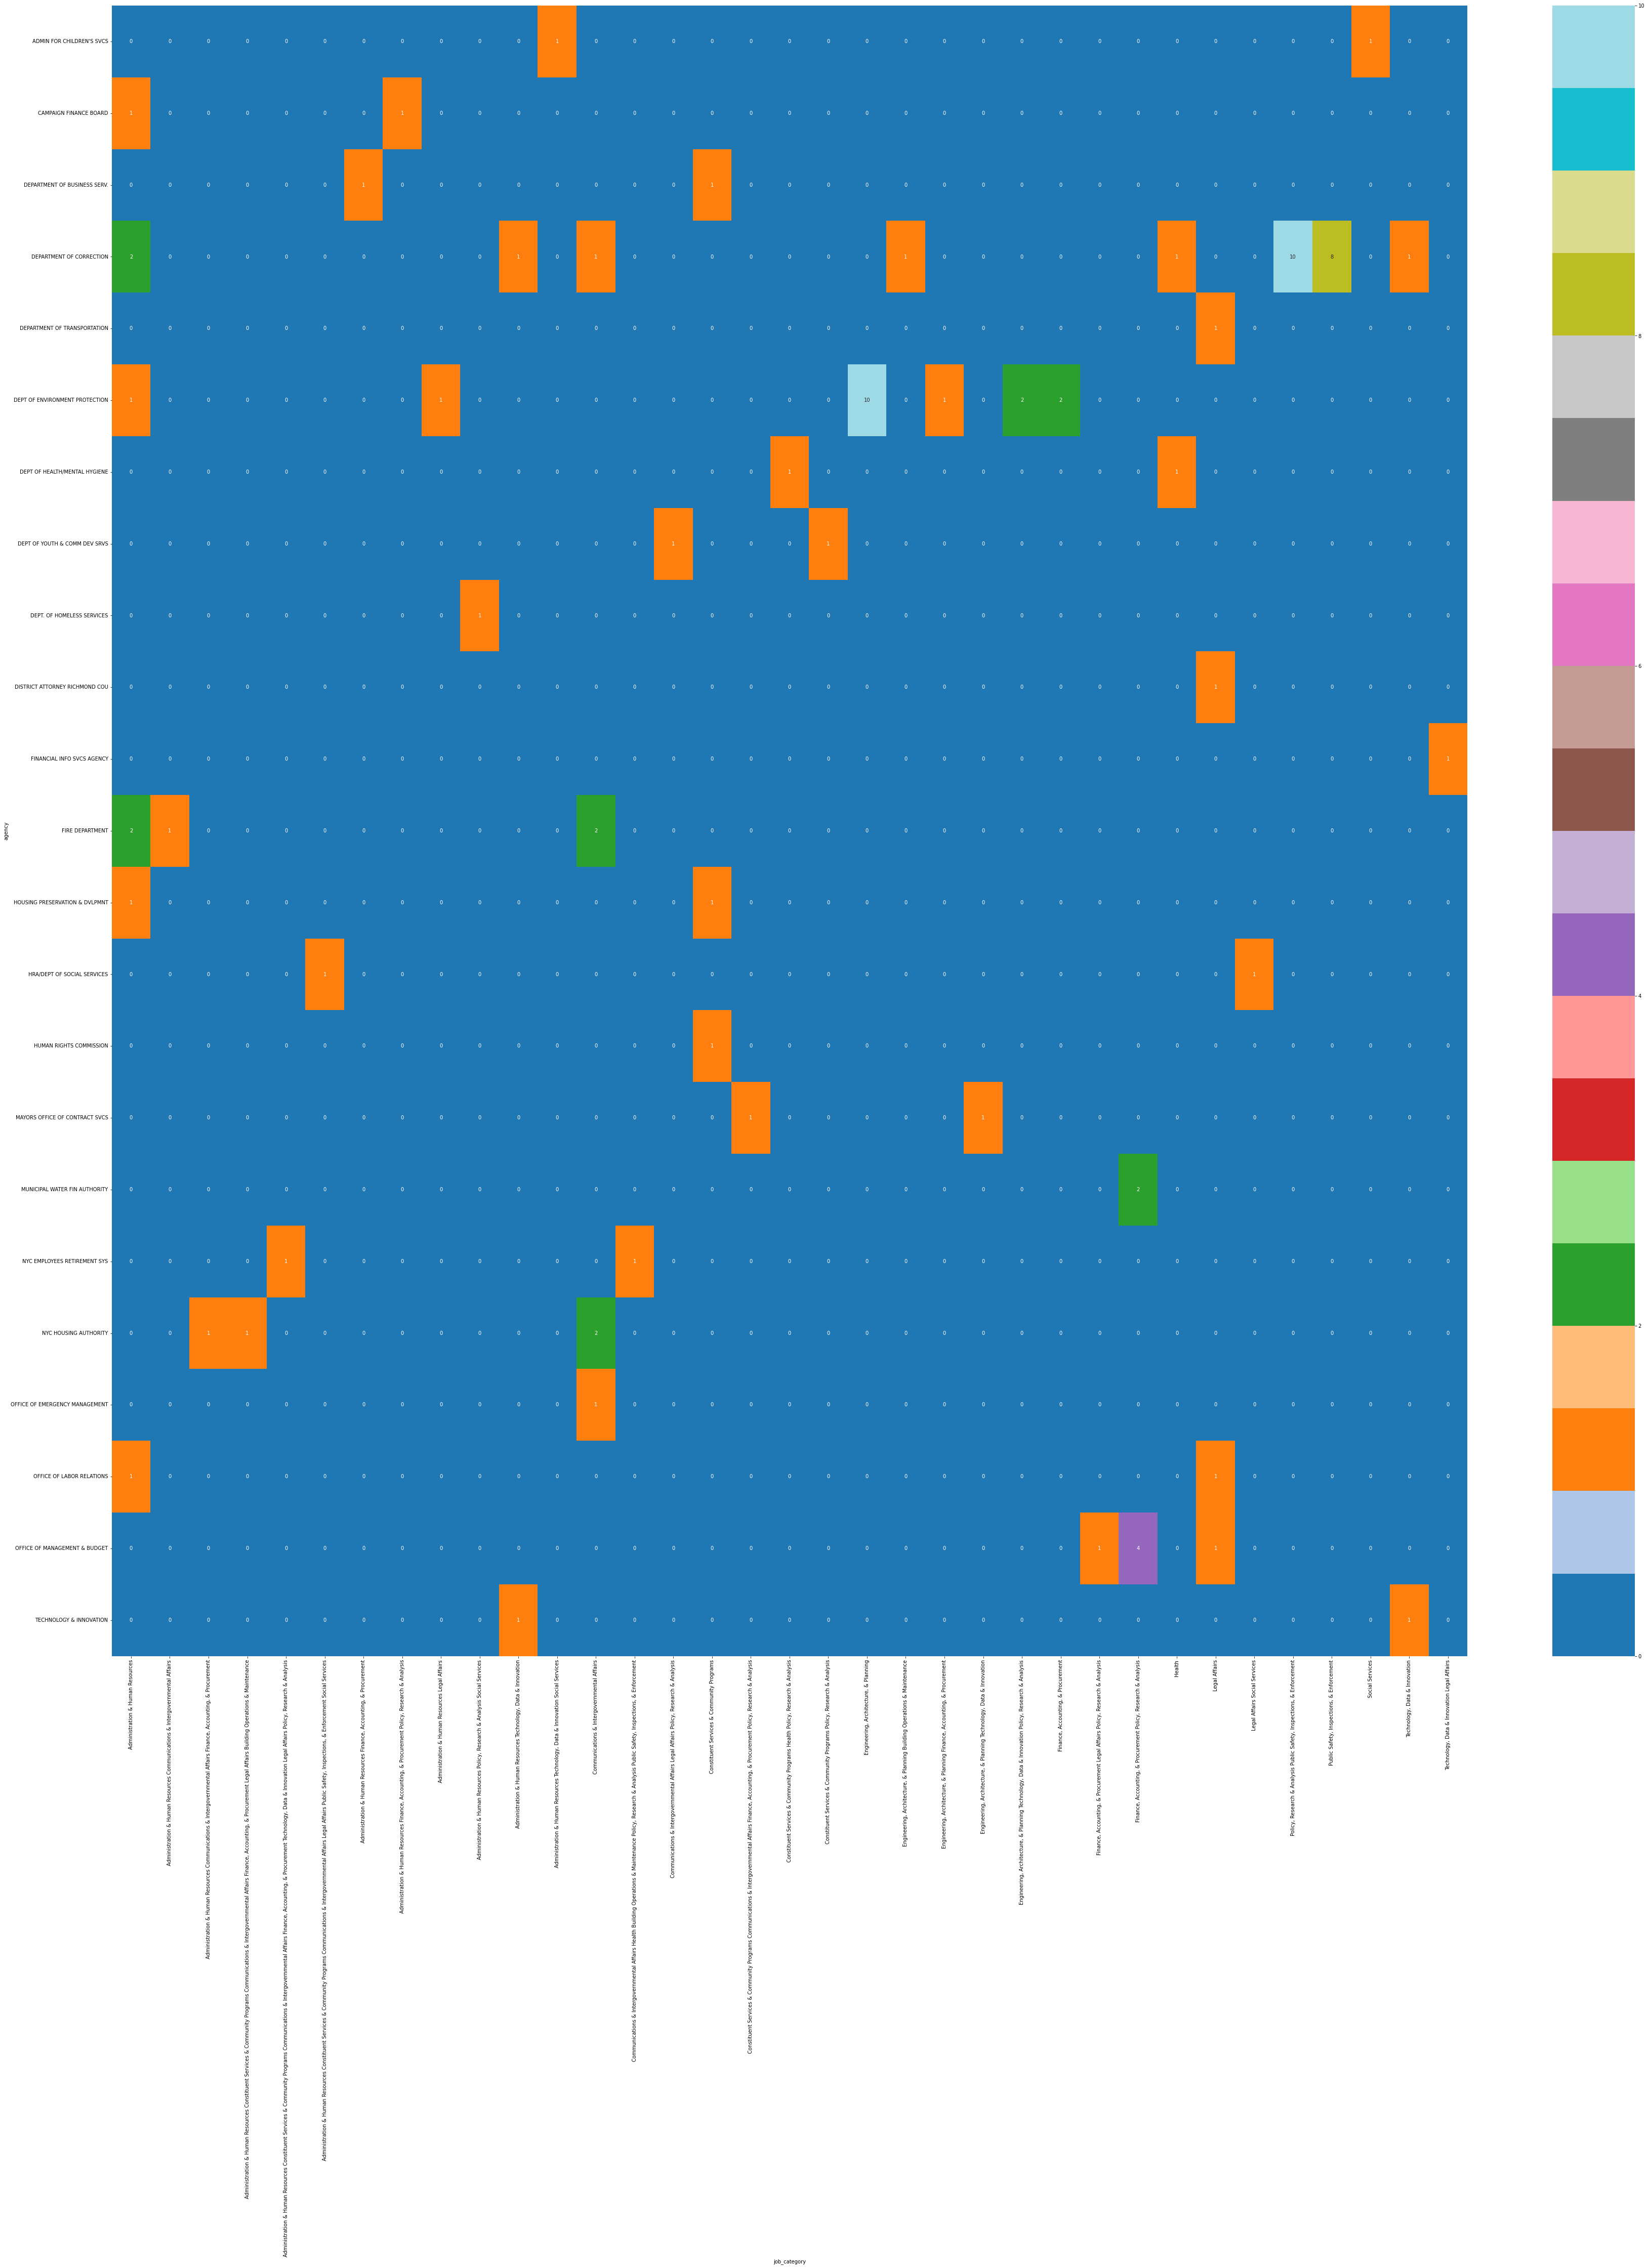

In [284]:
import numpy as np
new_df=df[df['career_level']=='Executive']
agency = new_df.groupby(['agency' , 'job_category'])['number_of_positions'].sum().astype(float).reset_index()

#a=agency['number_of_positions'].sum()
a=agency.pivot(index='agency',columns='job_category',values='number_of_positions').fillna(0)
unique_agencies = df['agency'].unique()
unique_job_categories = df['job_category'].unique()

# Reindex the heatmap_data with all unique values
heatmap_data = a.reindex(index=unique_agencies, columns=unique_job_categories)
plt.figure(figsize=(60,60))
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)

sns.heatmap(a, annot=True, cmap="tab20")

## Trying to improve visuals

<AxesSubplot:xlabel='job_category', ylabel='agency'>

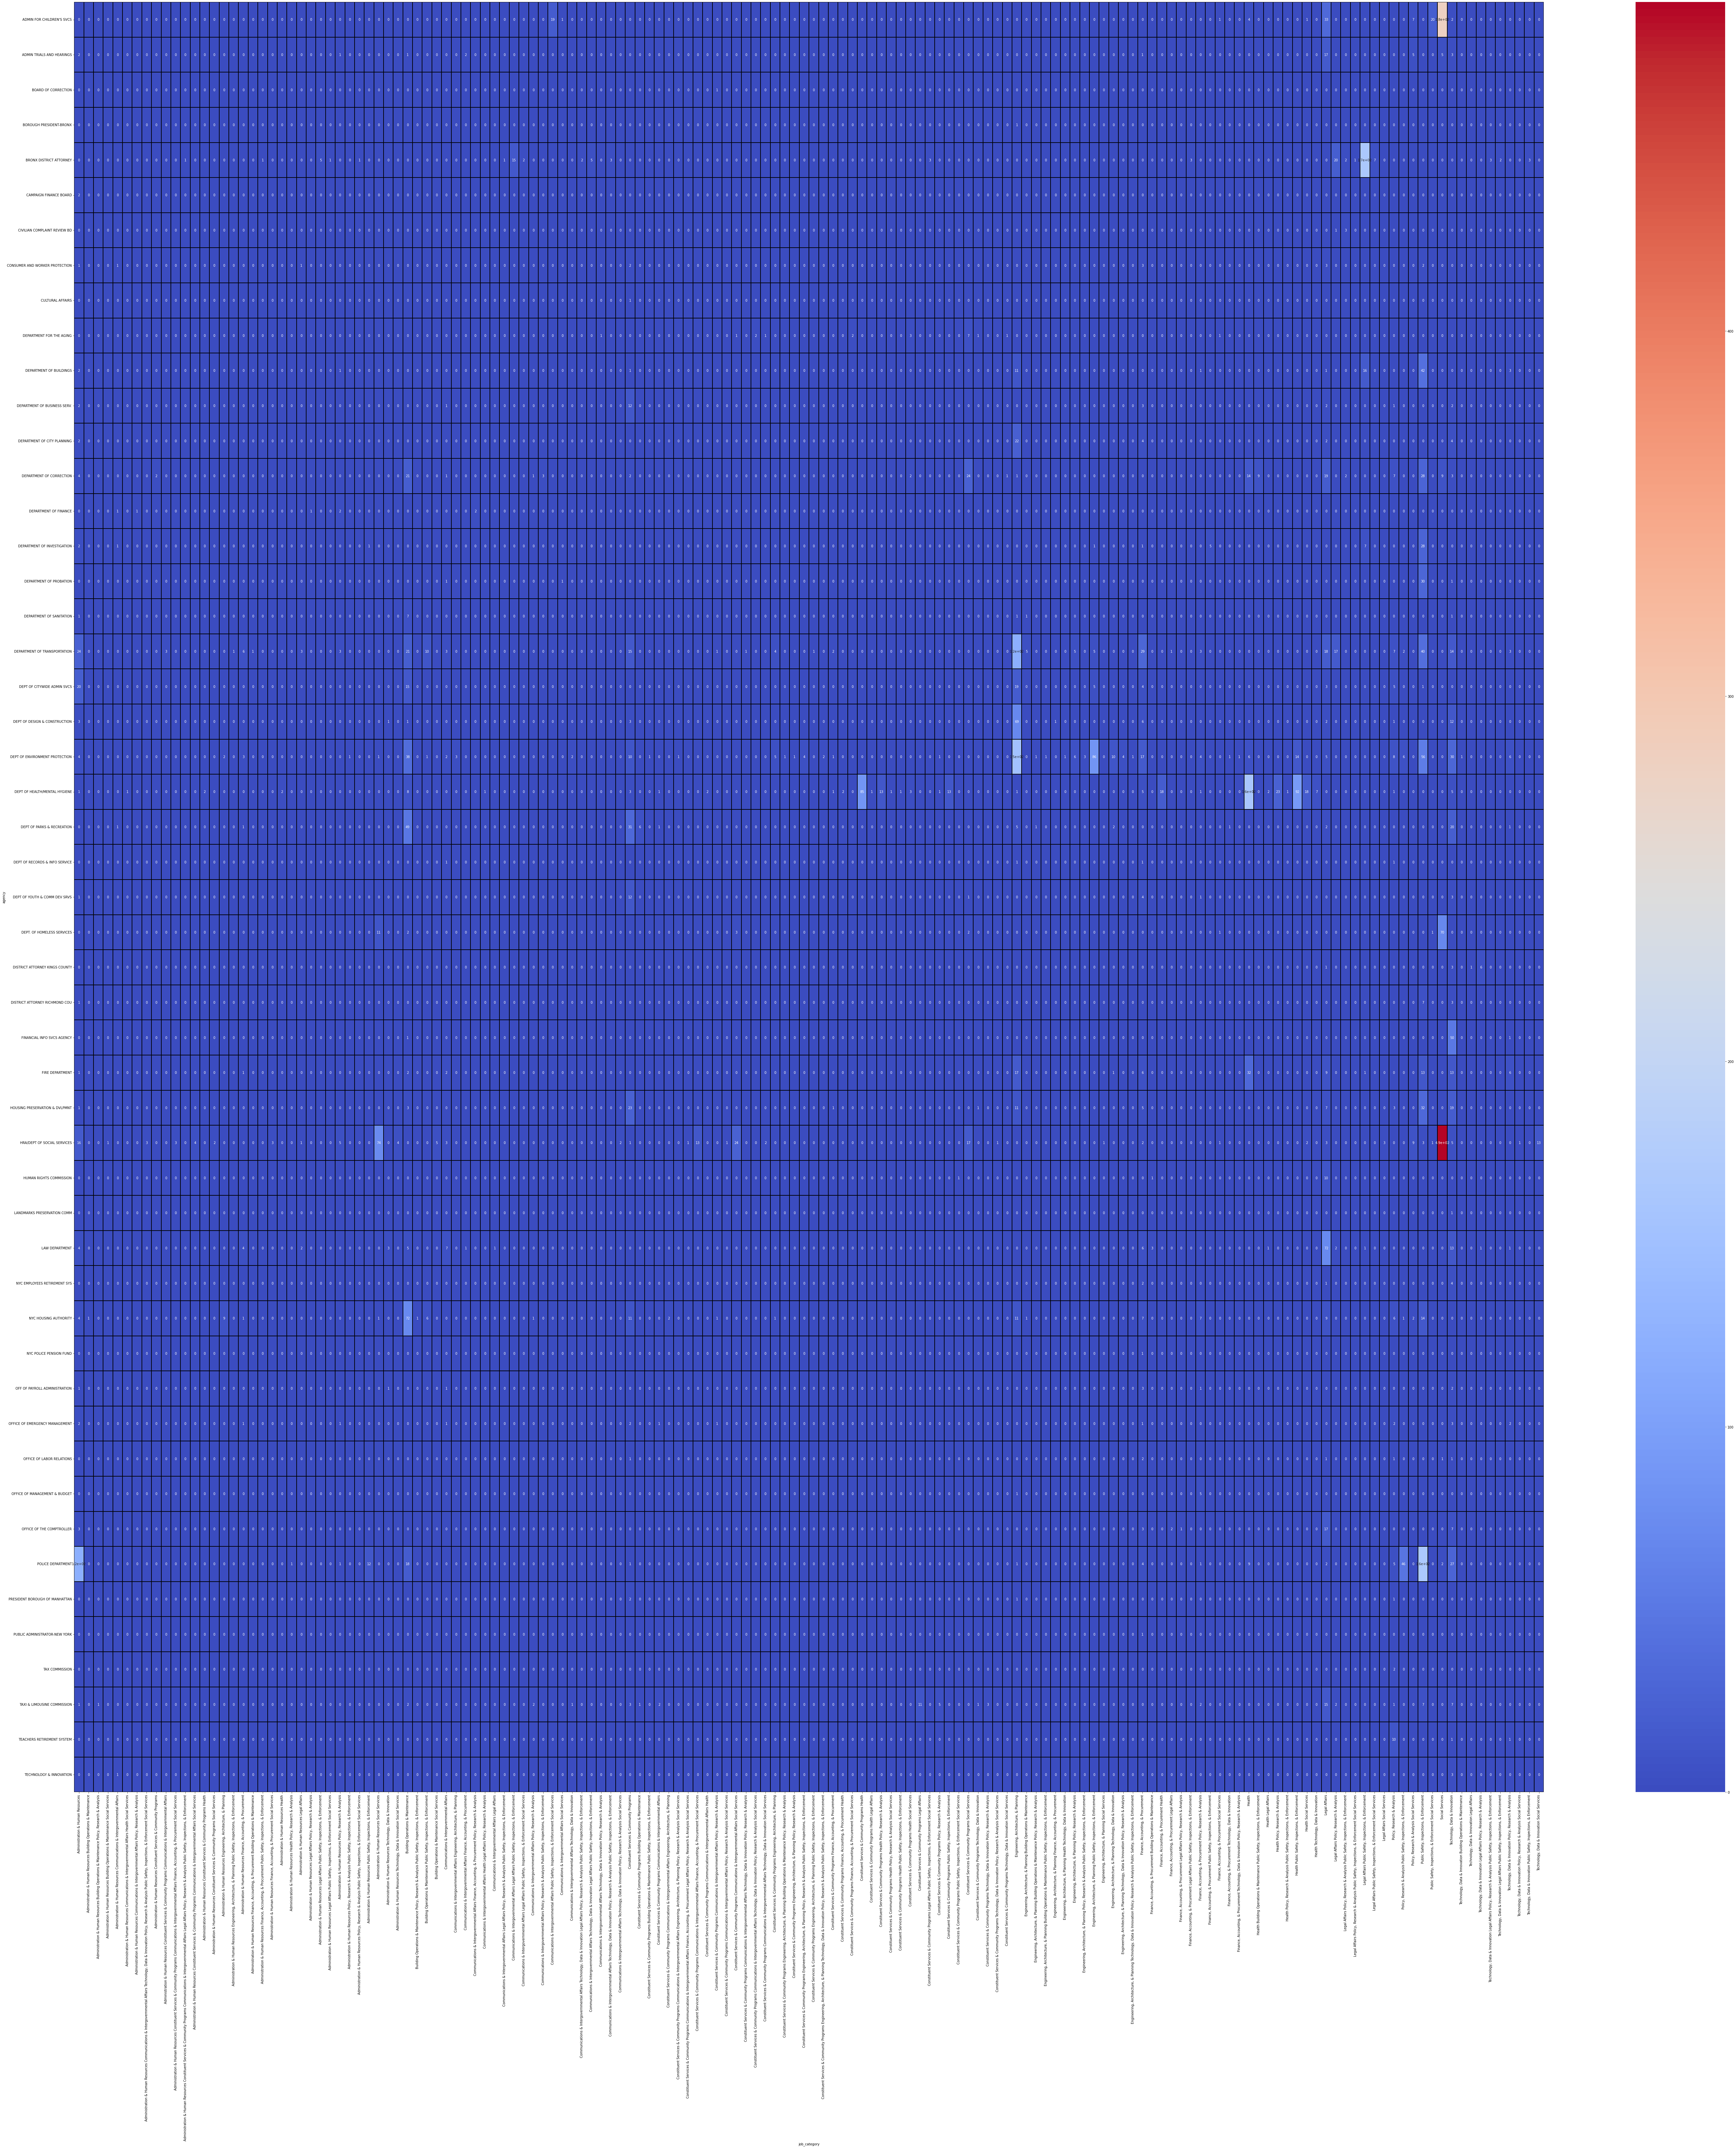

In [294]:
import numpy as np
new_df=df[df['career_level']=='Experienced (non-manager)']
agency = new_df.groupby(['agency' , 'job_category'])['number_of_positions'].sum().astype(float).reset_index()

#a=agency['number_of_positions'].sum()
a=agency.pivot(index='agency',columns='job_category',values='number_of_positions').fillna(0)
# unique_agencies = df['agency'].unique()
# unique_job_categories = df['job_category'].unique()

# Reindex the heatmap_data with all unique values
# heatmap_data = a.reindex(index=unique_agencies, columns=unique_job_categories)
plt.figure(figsize=(100,100))
#plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
#plt.yticks(ticks=range(len(a.index)), labels=a.index)


sns.heatmap(a, annot=True, cmap="tab20",linecolor='black',linewidth=2)

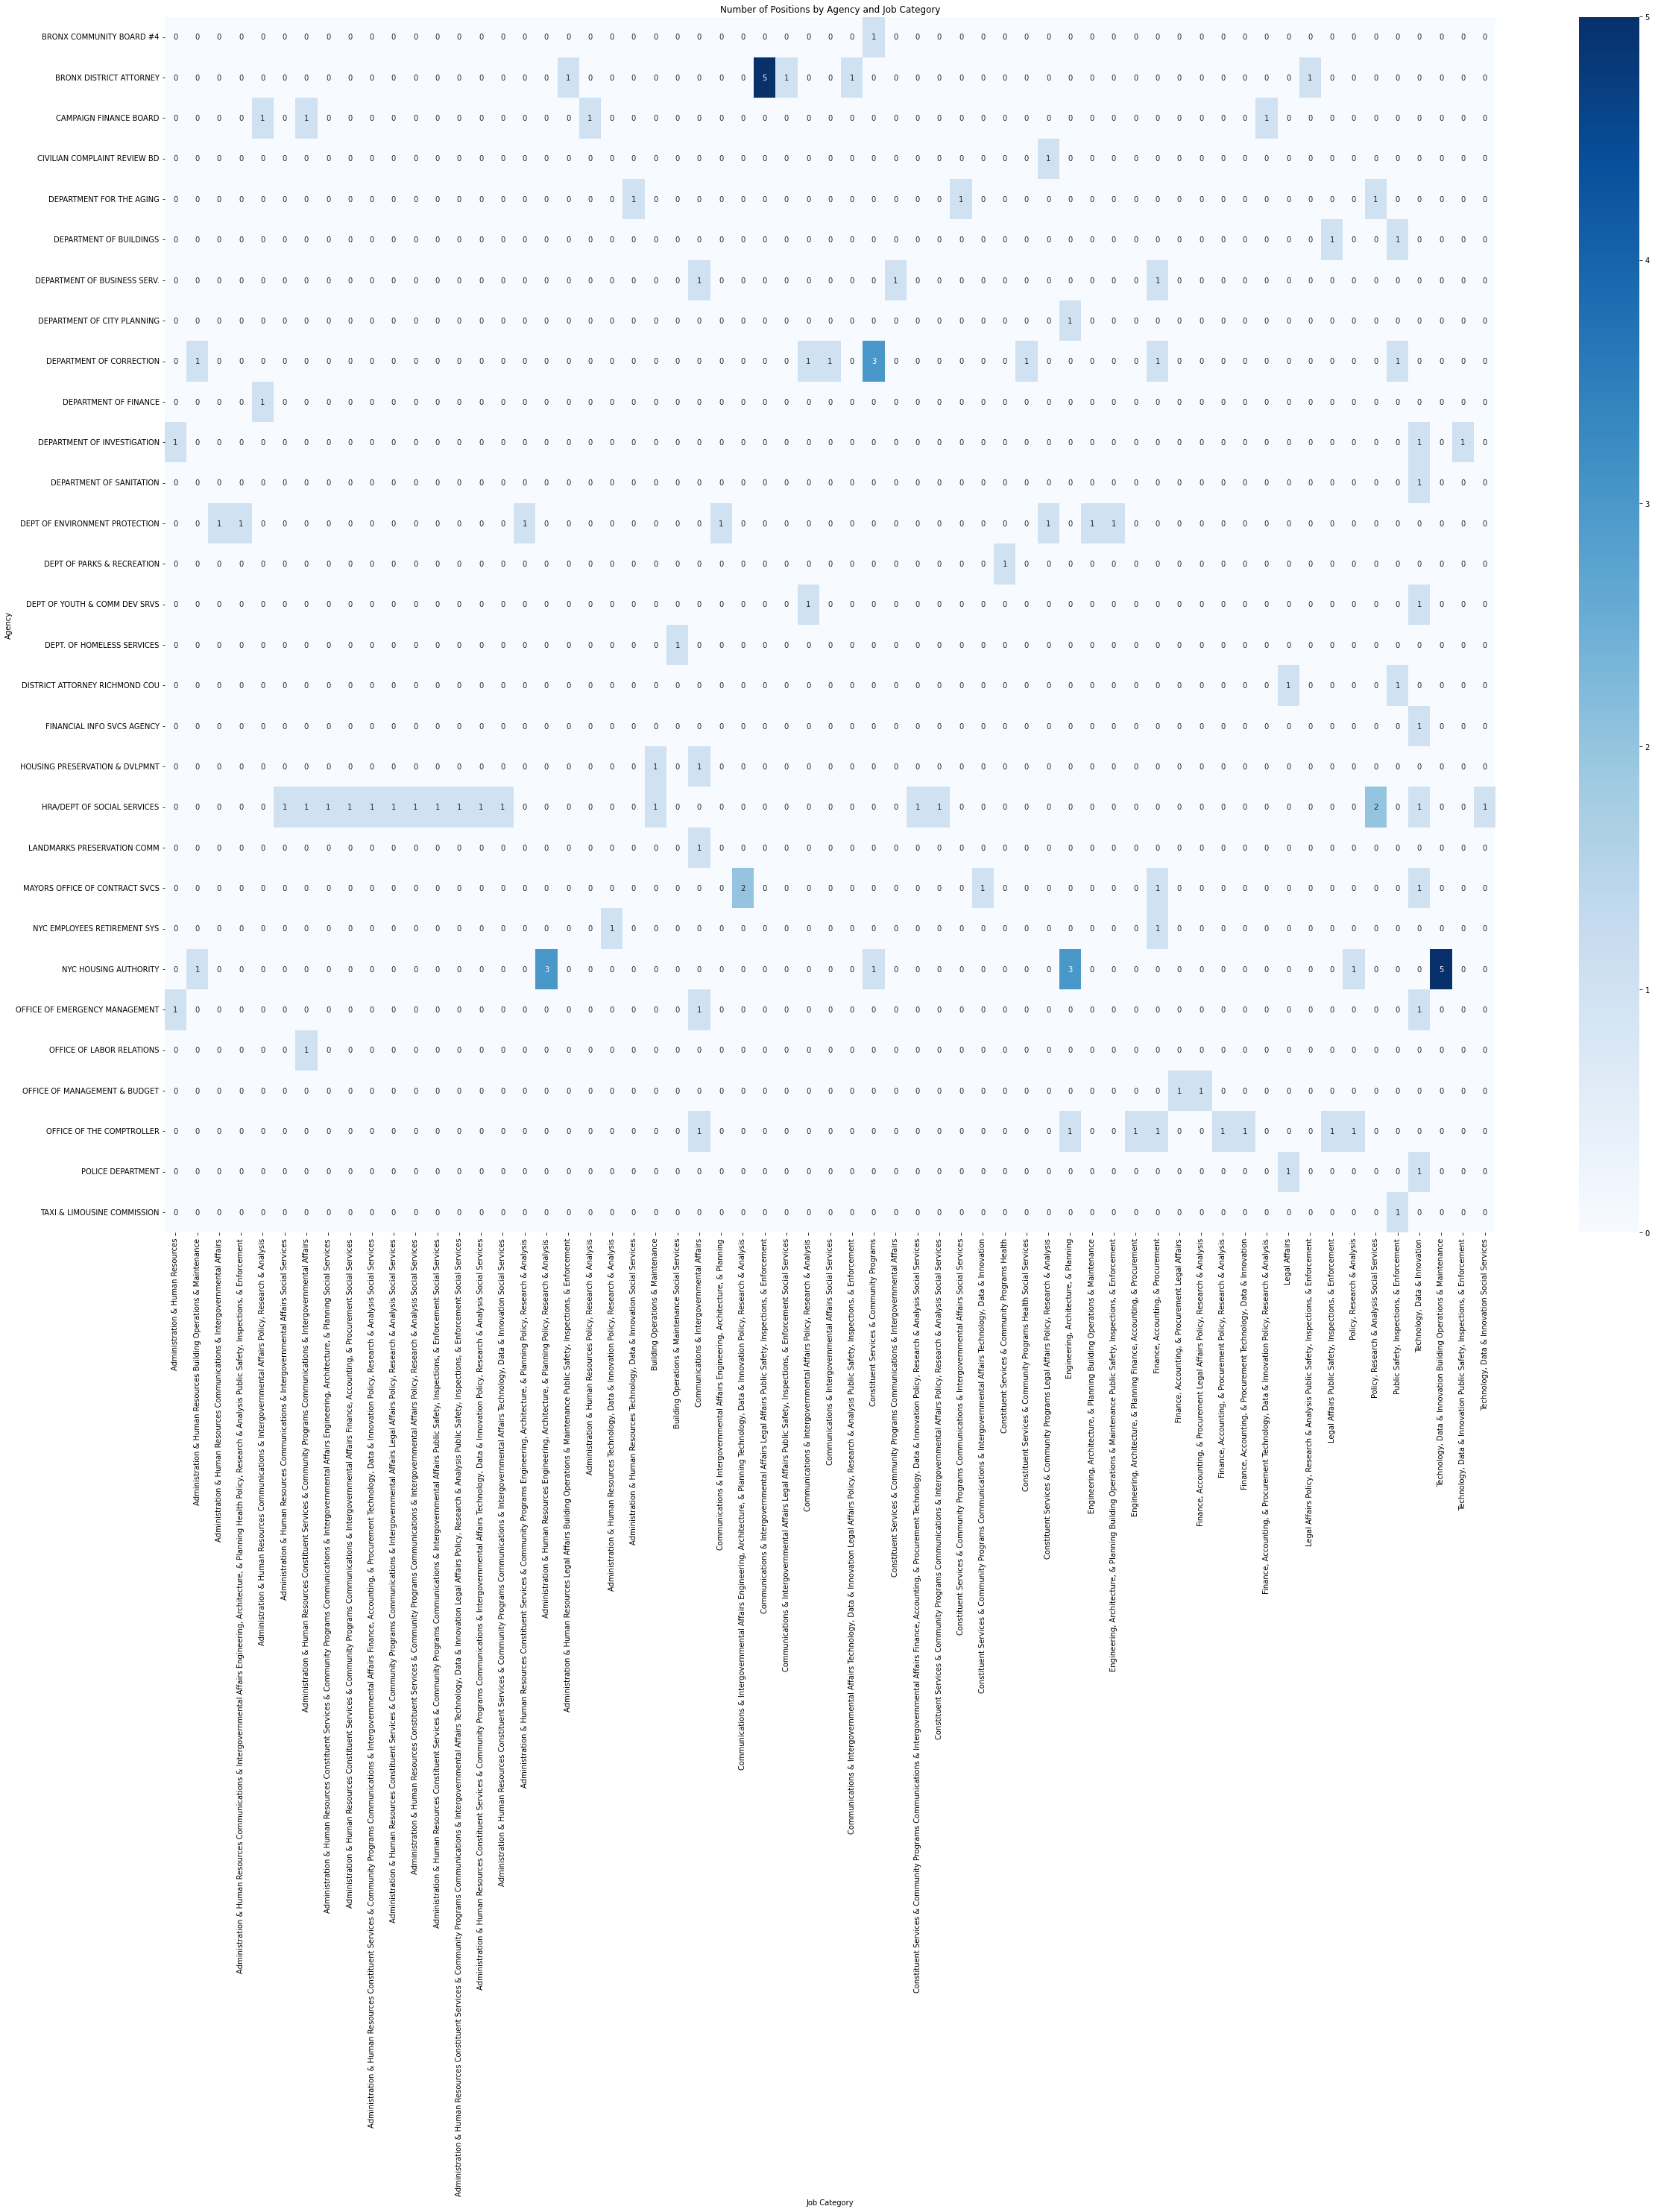

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping and aggregating the data
new_df=x[x['career_level']=='Manager']

agency = new_df.groupby(['agency', 'job_category'])['number_of_positions'].sum().reset_index()

# Pivot the data for heatmap visualization
heatmap_data = agency.pivot(index='agency', columns='job_category', values='number_of_positions').fillna(0)

# Creating the heatmap
plt.figure(figsize=(40,30))
sns.heatmap(heatmap_data, annot=True, cmap="Blues")
plt.title('Number of Positions by Agency and Job Category')
plt.xlabel('Job Category')
plt.ylabel('Agency')
plt.show()

In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = px.pie(car, values='count',names='Level',hole=.3,hover_name='Level')
fig.show()


In [ ]:
line_chart_date=df.copy()
line_chart_date['posting_date']=pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_date']=line_chart_date['posting_date'].dt.strftime('%m-%y')



In [ ]:
jobs_per_month=line_chart_date['month_date'].value_counts().reset_index()

In [ ]:
jobs_per_month

In [ ]:
import plotly.express as px


In [ ]:
fig.show()

In [ ]:
sum_column = sum(int(val) for val in df['number_of_positions'])



In [ ]:
sum_column

In [ ]:
line_chart_date=df.copy()
line_chart_date['posting_date']=pd.to_datetime(line_chart_date['posting_date']).sort_index()
line_chart_date['month_year']=line_chart_date['posting_date'].dt.strftime('%m/%y')
jobs_per_month=line_chart_date['month_year'].value_counts().reset_index()
jobs_per_month=jobs_per_month.rename(columns={'index':'Month Year','month_year':'Job Count'})

In [ ]:

fig=px.line(jobs_per_month,x='Month Year',y='Job Count')
fig.show()

In [ ]:
line_chart_date=df.copy()
line_chart_date['posting_date']=pd.to_datetime(line_chart_date['posting_date']).sort_index()
line_chart_date['month_year']=line_chart_date['posting_date'].dt.strftime('%m/%y')
jobs_per_month=line_chart_date['month_year'].value_counts().reset_index()
jobs_per_month=jobs_per_month.rename(columns={'index':'Month Year','month_year':'Job Count'})

In [ ]:
line_chart_date = df.copy()
line_chart_date['posting_date'] = pd.to_datetime(line_chart_date['posting_date'])
line_chart_date['month_year'] = line_chart_date['posting_date'].dt.strftime('%m/%Y')
jobs_per_month = line_chart_date['month_year'].value_counts().reset_index()
jobs_per_month = jobs_per_month.rename(columns={'index': 'Month Year', 'month_year': 'Job Count'})

# Convert 'Month Year' to a pandas datetime column and sort by it
jobs_per_month['Month Year'] = pd.to_datetime(jobs_per_month['Month Year'], format='%m/%Y')
jobs_per_month = jobs_per_month.sort_values('Month Year')

fig = px.line(jobs_per_month, x='Month Year', y='Job Count')
fig.show()

In [ ]:
df.isnull().sum()

In [ ]:
df['Work Location']=df['work_location_1'].fillna(df['work_location'])

In [ ]:
df.isnull().sum()

In [ ]:
print(df['number_of_positions'].dtype)
print(df['number_of_positions'].isnull().sum())


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df['number_of_positions'] = df['number_of_positions'].astype(np.int64)

x=df.drop_duplicates(['career_level','number_of_positions'])

plt.figure(figsize=(30,10))
table=x.pivot_table(index='career_level',values='number_of_positions',aggfunc=np.sum)
table = table.astype(np.int64)

sns.heatmap(table,annot=True,fmt='d',cmap="Blues")

In [99]:
# agency=df['agency'].unique().tolist()
# agency
pip install NumPy

SyntaxError: invalid syntax (3817193046.py, line 3)

<AxesSubplot:xlabel='job_category', ylabel='agency'>

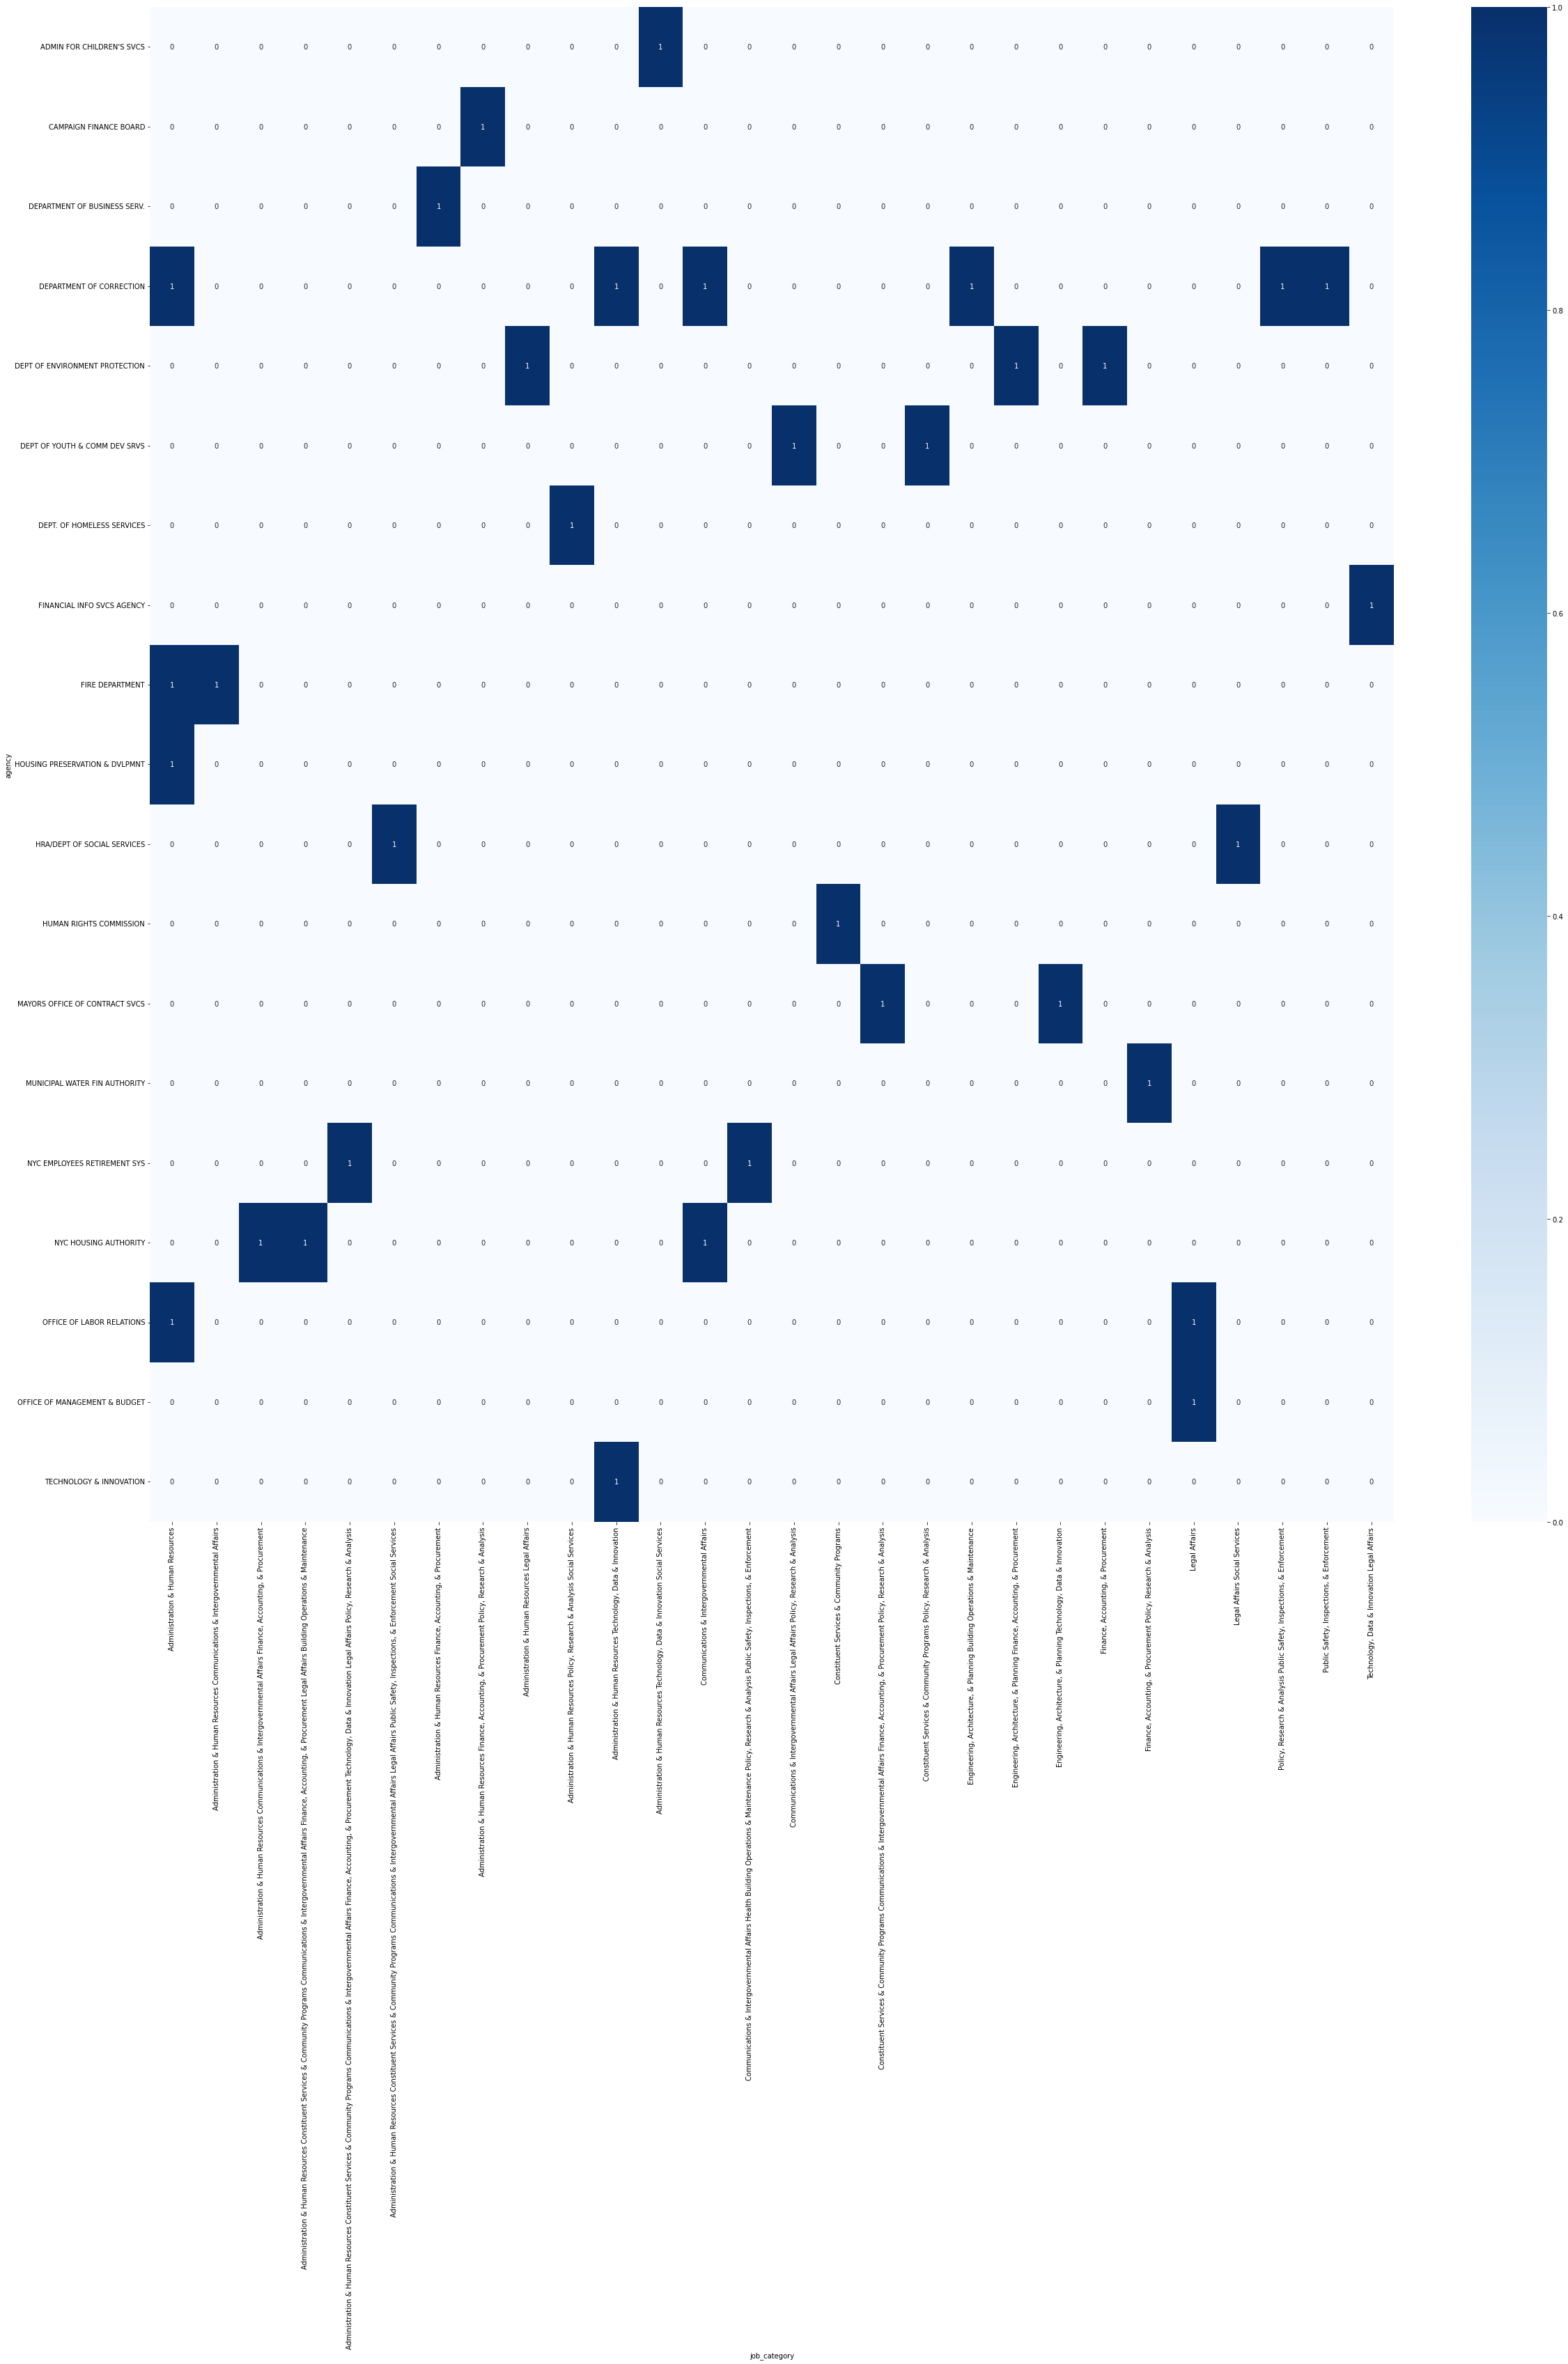

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df['number_of_positions'] = df['number_of_positions'].astype(float)
values=df.groupby('agency','job_category')['number_of_positions']

# x=df.drop_duplicates(['agency','job_category','number_of_positions'])

new_df=x[x['career_level']=='Executive']
plt.figure(figsize=(40,40))
table=new_df.pivot_table(index='agency',columns='job_category',values='number_of_positions',aggfunc='count').fillna(0)
table = table.astype(float)

sns.heatmap(table,annot=True,cmap="Blues")


In [39]:
m=df['division_work_unit'].value_counts().reset_index()

m

In [40]:
m

,index,division_work_unit
0,Information Technology,80
1,BWT - ADMINISTRATION/PERSONNEL,79
2,Dept of Environment Protection,71
3,FIA Operations-NM,71
4,Mgmt Information System-NM,68
...,...,...
1036,BX Court Section/CIV & Cadet,1
1037,TB Administration,1
1038,TB Surveillance & Epidemiology,1
1039,81ST Precinct-Civilian/Cadet,1


In [41]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [42]:
import folium


In [43]:
df_location=df[['work_location','number_of_positions']]

In [44]:
m=folium.Map(location=([40.7128, -74.0060]),tiles='Stamen Terrain',zoom_start=15)

In [45]:
m

In [46]:
import folium

# Create a map centered on NYC
nyc_location = [40.7128, -74.0060]
nyc_map = folium.Map(location=nyc_location, zoom_start=10)

# Display the map
nyc_map

In [47]:
df['Work Location']=df['work_location_1'].fillna(df['work_location'])


In [48]:
df['work_location']=df['work_location_1'].fillna(df['work_location'])

job_locations = df['work_location']
job_locations.columns = ['Latitude', 'Longitude']
job_locations = job_locations

# Create a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
for index, location in job_locations.iteritems():
    latitude, longitude = location.split(',')
    folium.Marker([latitude, longitude]).add_to(nyc_map)


# Display the map using Streamlit





ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
nyc_map.show()


In [ ]:
df['Work Location'].head()

In [ ]:
import folium

# create a map centered at a specific location
m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
folium.Marker(location=[40.7128, -74.0060], tooltip="New York City").add_to(m)


In [ ]:
m

In [ ]:

pip install geopy


In [296]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")

address= '59-17 Junction Blvd Corona Ny'

location = geolocator.geocode(address)
cordinates=location.latitude,location.longitude
cordinates
#df['Coordinates'] = df['work_location'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))


(40.749157, -73.869425)

In [ ]:
df['Neighborhood'] = df['Coordinates'].apply(geolocator.reverse).apply(lambda x: x.raw['work_location'].get('neighbourhood'))


In [ ]:
grouped_data = df.groupby("Neighborhood")["number_of_positions"].sum().reset_index()


In [ ]:
import folium

map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

for _, row in grouped_data.iterrows():
    folium.Marker(location=row['Coordinates'], tooltip=f"{row['Neighborhood']}: {row['Number of Jobs']} jobs").add_to(map)

map


In [ ]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")
df['location'] = df['work_location'].apply(geolocator.geocode)
df['location']
df['latitude'] = df['location'].apply(lambda x: x.latitude if x else None)



In [297]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut
from geopy.point import Point
from joblib import Parallel, delayed

# create geolocator object
options = geopy.geocoders.options.Options(timeout=10)
geolocator = Nominatim(user_agent="my_app", options=options)

# define a rate limiter to avoid hitting API rate limits
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1, max_retries=5, error_wait_seconds=10)

# load the data into a pandas dataframe
data = df.copy()

# define a function to geocode a single address
def geocode_address(address):
    try:
        location = geocode(address)
        if location:
            return Point(location.latitude, location.longitude)
    except (GeocoderTimedOut, ValueError) as e:
        print(f"Error geocoding {address}: {e}")
    return None

# batch the addresses and geocode each batch separately
batch_size = 100
n_batches = (len(data) + batch_size - 1) // batch_size

for i in range(n_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(data))
    batch = data.iloc[start_idx:end_idx]

    # geocode the batch in parallel
    results = Parallel(n_jobs=-1)(delayed(geocode_address)(address) for address in batch['work_location'].to_list())

    # update the dataframe with the results
    data.loc[start_idx:end_idx, 'latitude'] = [r.latitude if isinstance(r, geopy.location.Location) else None for r in results]
    data.loc[start_idx:end_idx, 'longitude'] = [r.longitude if isinstance(r, geopy.location.Location) else None for r in results]

    # save the results to a cache file
    cache_file = f"/path/to/cache/batch_{i}.csv"
    batch.to_csv(cache_file, index=False)

# combine the results from the cache files
results = []
for i in range(n_batches):
    cache_file = f"/path/to/cache/batch_{i}.csv"
    batch = pd.read_csv(cache_file)
    results.append(batch)

data = pd.concat(results, ignore_index=True)

# print the resulting dataframe
print(data.head())








AttributeError: type object 'options' has no attribute 'Options'

In [298]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from joblib import Parallel, delayed
import os

# create geolocator object
geolocator = Nominatim(user_agent="my_app")

# load the data into a pandas dataframe
data = df

# define a function to geocode a single address
def geocode_address(address):
    return geolocator.geocode(address)

# define a function to cache geocoding results
def cache_result(address, result, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    with open(filename, "w") as f:
        f.write(str(result))

# define a function to retrieve cached geocoding results
def retrieve_result(address, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    if os.path.exists(filename):
        with open(filename, "r") as f:
            return f.read()
    else:
        return None

# define the cache directory
cache_dir = "cache"

# create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# apply geocoding to the entire dataframe in parallel
try:
    results = Parallel(n_jobs=-1)(delayed(retrieve_result)(address, cache_dir) or cache_result(address, geocode_address(address), cache_dir) for address in data['work_location'].to_list())
except Exception as e:
    print(f"An exception occurred: {e}")

# extract the latitude and longitude from the location object
data['latitude'] = [float(r.split(',')[0]) if r is not None else None for r in results]
data['longitude'] = [float(r.split(',')[1]) if r is not None else None for r in results]

# print the resulting dataframe
print(data.head())


   Job ID                          agency  number_of_positions  \
0  570873     DEPT OF CITYWIDE ADMIN SVCS                  2.0   
1  560933  DEPT OF ENVIRONMENT PROTECTION                  1.0   
2  565857               POLICE DEPARTMENT                  1.0   
3  571786        DEPARTMENT OF CORRECTION                  1.0   
4  566099     DEPT OF CITYWIDE ADMIN SVCS                  1.0   

                                 Title            civil_service_title  \
0  Assistant Engineer, Load Management  ASSISTANT MECHANICAL ENGINEER   
1              City Research Scientist        CITY RESEARCH SCIENTIST   
2           Police Administrative Aide     POLICE ADMINISTRATIVE AIDE   
3        Business Intelligence Analyst        CITY RESEARCH SCIENTIST   
4                    Portfolio Manager                  SPACE ANALYST   

                                        job_category  \
0              Engineering, Architecture, & Planning   
1  Constituent Services & Community Programs Poli...

In [299]:
df.shape

(3080, 19)

In [301]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from joblib import Parallel, delayed
import os

# create geolocator object
geolocator = Nominatim(user_agent="my_app")

# create rate limiter object
rate_limiter = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# load the data into a pandas dataframe
data = df

# define a function to geocode a single address
def geocode_address(address):
    return rate_limiter(address)

# define a function to cache geocoding results
def cache_result(address, result, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    with open(filename, "w") as f:
        f.write(str(result))

# define a function to retrieve cached geocoding results
def retrieve_result(address, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    if os.path.exists(filename):
        with open(filename, "r") as f:
            return f.read()
    else:
        return None

# define the cache directory
cache_dir = "cache"

# create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# apply geocoding to the entire dataframe in parallel
try:
    results = Parallel(n_jobs=-1)(delayed(retrieve_result)(address, cache_dir) or cache_result(address, geocode_address(address), cache_dir) for address in data['work_location'].to_list())
except Exception as e:
    print(f"An exception occurred: {e}")

# extract the latitude and longitude from the location object
data['latitude'] = [float(r.latitude) if r is not None else None for r in results]
data['longitude'] = [float(r.longitude) if r is not None else None for r in results]

# print the resulting dataframe
print(data.head(50)[['latitude', 'longitude']])


   latitude longitude
0      None      None
1      None      None
2      None      None
3      None      None
4      None      None
5      None      None
6      None      None
7      None      None
8      None      None
9      None      None
10     None      None
11     None      None
12     None      None
13     None      None
15     None      None
16     None      None
17     None      None
18     None      None
19     None      None
20     None      None
21     None      None
22     None      None
23     None      None
24     None      None
25     None      None
26     None      None
27     None      None
28     None      None
29     None      None
30     None      None
31     None      None
32     None      None
33     None      None
34     None      None
35     None      None
36     None      None
37     None      None
38     None      None
39     None      None
40     None      None
41     None      None
42     None      None
43     None      None
44     None      None
45     Non

In [302]:
import pandas as pd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from joblib import Parallel, delayed
import os

# Create geolocator object
geolocator = Nominatim(user_agent="my_app")

# Create rate limiter object
rate_limiter = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Load the data into a pandas dataframe
data = df

# Define a function to geocode a single address
def geocode_address(address):
    return rate_limiter(address)

# Define a function to cache geocoding results
def cache_result(address, result, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    with open(filename, "w") as f:
        if result is not None:
            f.write(f"{result.latitude},{result.longitude}")

# Define a function to retrieve cached geocoding results
def retrieve_result(address, cache_dir):
    filename = os.path.join(cache_dir, address.replace(" ", "_"))
    if os.path.exists(filename):
        with open(filename, "r") as f:
            content = f.read()
            if content:
                latitude, longitude = content.split(",")
                return geopy.point.Point(latitude=float(latitude), longitude=float(longitude))
    return None

# Define the cache directory
cache_dir = "cache"

# Create the cache directory if it doesn't exist
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# Apply geocoding to the entire dataframe in parallel
try:
    results = Parallel(n_jobs=-1)(delayed(retrieve_result)(address, cache_dir) or cache_result(address, geocode_address(address), cache_dir) for address in data['work_location'].to_list())
except Exception as e:
    print(f"An exception occurred: {e}")

# Extract the latitude and longitude from the location object
data['latitude'] = [float(r.latitude) if r is not None else None for r in results]
data['longitude'] = [float(r.longitude) if r is not None else None for r in results]

# Print the resulting dataframe
print(data.head(50)[['latitude', 'longitude']])


   latitude longitude
0      None      None
1      None      None
2      None      None
3      None      None
4      None      None
5      None      None
6      None      None
7      None      None
8      None      None
9      None      None
10     None      None
11     None      None
12     None      None
13     None      None
15     None      None
16     None      None
17     None      None
18     None      None
19     None      None
20     None      None
21     None      None
22     None      None
23     None      None
24     None      None
25     None      None
26     None      None
27     None      None
28     None      None
29     None      None
30     None      None
31     None      None
32     None      None
33     None      None
34     None      None
35     None      None
36     None      None
37     None      None
38     None      None
39     None      None
40     None      None
41     None      None
42     None      None
43     None      None
44     None      None
45     Non

In [62]:
df['division_work_unit'].unique().shape

(1041,)

In [63]:
df['job_category'].unique().shape

(197,)

In [64]:
df['agency'].unique().shape

(57,)